In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('./data/numerical_Data.csv')

In [18]:
df

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,192.0,7.8,277543.0,7.061101,460000000,667830256,2265935552,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,181.0,8.4,1143642.0,8.489533,400000000,858373000,2794731755,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,137.0,6.6,533763.0,6.272064,379000000,241071802,1045713802,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,141.0,7.3,870573.0,7.214013,365000000,459005868,1395316979,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,149.0,8.4,1091968.0,8.460958,300000000,678815482,2048359754,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,100.0,7.2,110078.0,6.017902,65000,11529368,22233808,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4376,98.0,6.6,7986.0,4.231464,50000,10426506,10426506,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4377,93.0,4.9,1593.0,2.526405,50000,2335352,2335352,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4378,98.0,6.2,14595.0,4.242085,50000,391674,424149,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
# nromalizar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.620192,0.807692,0.102949,0.694009,1.000000,0.778019,0.775022,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.567308,0.884615,0.424216,0.842734,0.869551,1.000000,0.955887,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.355769,0.653846,0.197990,0.611856,0.823894,0.280847,0.357667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.375000,0.743590,0.322925,0.709929,0.793456,0.534739,0.477242,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.413462,0.884615,0.405049,0.839758,0.652136,0.790816,0.700604,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
X = df.drop(columns=['Worldwide gross $'])

y = df['Worldwide gross $']

print(X.shape)
print(y.shape)

(4380, 29)
(4380,)


In [21]:
X = np.asarray(X)
y = np.asarray(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [24]:
# modelo de regresión
model = Sequential([
    Dense(128, input_shape=(X.shape[1],), activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# compilación del modelo de regresión
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [26]:
model_history =  model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/500


66/66 - 1s - 15ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 2/500
66/66 - 0s - 1ms/step - loss: 9.3293e-04 - val_loss: 7.0955e-04
Epoch 3/500
66/66 - 0s - 1ms/step - loss: 6.3158e-04 - val_loss: 5.3614e-04
Epoch 4/500
66/66 - 0s - 1ms/step - loss: 4.7708e-04 - val_loss: 4.8875e-04
Epoch 5/500
66/66 - 0s - 1ms/step - loss: 4.0596e-04 - val_loss: 5.2096e-04
Epoch 6/500
66/66 - 0s - 1ms/step - loss: 3.8580e-04 - val_loss: 4.7490e-04
Epoch 7/500
66/66 - 0s - 1ms/step - loss: 3.9660e-04 - val_loss: 9.0786e-04
Epoch 8/500
66/66 - 0s - 1ms/step - loss: 3.7255e-04 - val_loss: 5.9564e-04
Epoch 9/500
66/66 - 0s - 1ms/step - loss: 3.6617e-04 - val_loss: 5.3544e-04
Epoch 10/500
66/66 - 0s - 1ms/step - loss: 3.1516e-04 - val_loss: 4.7592e-04
Epoch 11/500
66/66 - 0s - 1ms/step - loss: 2.8803e-04 - val_loss: 6.1900e-04
Epoch 12/500
66/66 - 0s - 1ms/step - loss: 3.2275e-04 - val_loss: 5.8294e-04
Epoch 13/500
66/66 - 0s - 1ms/step - loss: 2.7729e-04 - val_loss: 5.0535e-04
Epoch 14/500
66/66 - 0s - 1

In [27]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

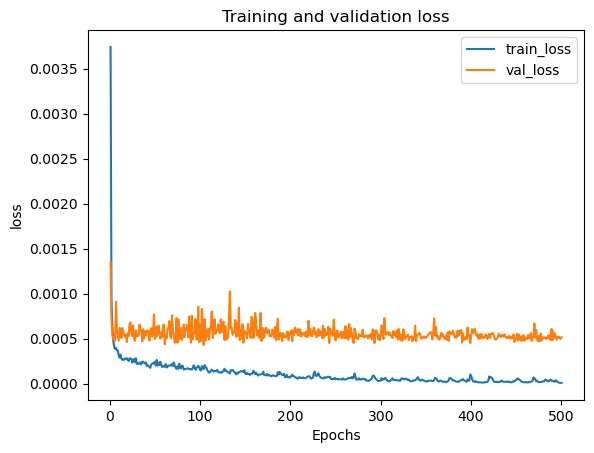

In [28]:
plot_metric(model_history, 'loss')

In [29]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.0005054721691271015